## Урок 8
1. Создать приложение, которое будет из готового файла с данными «Сбербанка» выводить результат по параметрам:<br>
Тип данных<br>
Интервал дат<br>
Область<br>
2. Визуализировать выводимые данные с помощью графика

In [173]:
import pandas as pd
import ipywidgets as widgets
from matplotlib import pyplot as plt
from IPython.display import HTML, display

%matplotlib inline

In [174]:
data_frame = pd.read_csv('opendata.csv', sep=',', encoding='cp1251')

data_frame['date'] = pd.to_datetime(data_frame['date'])

# Чтобы подписи к полям ввода помещались целиком
display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>'''))

w_names = widgets.Dropdown(options=set(data_frame['name']), description='Аналитика:', value=None,
                           layout={'width': 'max-content'})
w_regions = widgets.Dropdown(options=set(data_frame['region']), description='Регион:', value=None,
                             layout={'width': 'max-content'})
w_date_s = widgets.DatePicker(description='Начало периода')
w_date_e = widgets.DatePicker(description='Конец периода')

In [175]:
display(w_names)
display(w_regions)
display(w_date_s)
display(w_date_e)

Dropdown(description='Аналитика:', layout=Layout(width='max-content'), options=('Средний чек в формате Рестора…

Dropdown(description='Регион:', layout=Layout(width='max-content'), options=('Еврейская автономная область', '…

DatePicker(value=None, description='Начало периода')

DatePicker(value=None, description='Конец периода')

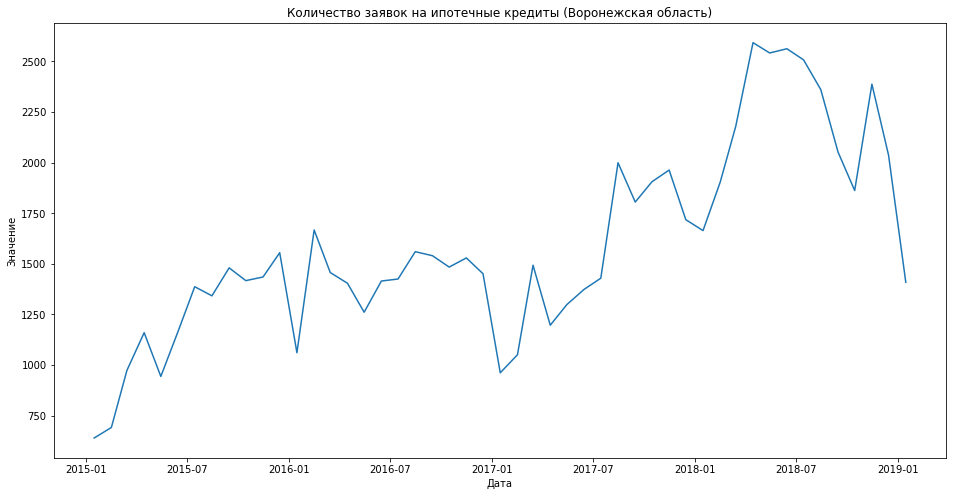

In [176]:
df = data_frame[(data_frame['name']==w_names.value) & \
                (data_frame['region']==w_regions.value) & \
                ((data_frame['date'] >= pd.Timestamp(w_date_s.value)) | (w_date_s.value == None)) & \
                ((data_frame['date'] <= pd.Timestamp(w_date_e.value)) | (w_date_e.value == None))]

plt.figure(figsize=(16, 8))
plt.plot(df['date'], df['value'])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title(w_names.value + ' (' + w_regions.value + ')')
plt.show()